In [1]:
filename jail1 url  "https://uofi.box.com/shared/static/9elozjsg99bgcb7gb546wlfr3r2gc9b7.csv" termstr=crlf;

data ccso;
length city $40. state $40. race $30. INCARCERATIONREASON $80. crimecode $80. employmentstatus $80. 
       citizenship $40. school $80. occupation $80. maritalstatus $40. chargestatute $80.
       prisonertype $40. arrestagency $80. releasedreason $80.;
 infile jail1 dsd firstobs=2 missover;
 input BOOKINGDATE :mmddyy10. BOOKINGNUMBER BOOKINGTIME :time20.3 CUSTODYCLASS $ EMPLOYMENTSTATUS $
       INCARCERATIONREASON $ JACKETNUMBER JACKETTYPE $ PRISONERTYPE $ RELEASEDDATE :mmddyy10.
       RELEASEDREASON $ RELEASEDTIME :time20.3 CHARGESTATUTE $ CRIMECODE $ STATUTETYPE $
       CITY $ RACE $ SEX $ STATE $ ZIPCODE 
       CITIZENSHIP $ MARITALSTATUS $ MILITARY $ OCCUPATION $ SCHOOL $
       ARRESTAGENCY $ AgeatArrest AgeatRelease BookingDateTime :anydtdtm40. ReleaseDateTime :anydtdtm40. 
       DaysinJail Hours Minutes Seconds;
format BOOKINGDATE mmddyy10. RELEASEDDATE mmddyy10. bookingtime time20.3 releasedtime time20.3 bookingdatetime datetime. 
       releasedatetime datetime.;
run;

SAS Connection established. Subprocess id is 2292



In [2]:
data ccso2;
    set ccso;
    hoursserved = (ReleaseDateTime - BookingDateTime) / 3600; /*computes hours by dividing total seconds by 3600 (# seconds in hour*/
    yearsservd = (ReleaseDateTime - BookingDateTime) / 3.154e+7; /*converts total seconds to years*/
    if hoursserved > 24;
run;

In [3]:
proc print data=ccso2(obs=10);
    var hoursserved EMPLOYMENTSTATUS RACE SEX RELEASEDREASON;
run;

Obs,hoursserved,employmentstatus,race,SEX,releasedreason
1,1392.21,Employed - Full Time,White,Male,Sentenced (transfer) to State Corrections Y
2,1392.21,Employed - Full Time,White,Male,Sentenced (transfer) to State Corrections Y
3,825.40,Unemployed,White,Male,Placed on Probation Y
4,76.45,Employed - Full Time,Black,Male,Cash Bond Posted
5,1602.14,Unemployed,Black,Male,Cash Bond Posted
6,598.52,Unemployed,White,Male,Sentenced (transfer) to State Corrections Y
7,598.52,Unemployed,White,Male,Sentenced (transfer) to State Corrections Y
8,79.07,Unemployed,Black,Male,Release on Personal Recognizance Y
9,31.75,,White,Female,Cash Bond Posted
10,31.75,,White,Female,Cash Bond Posted


In [7]:
data ccso3;
    set ccso;
    length race2 $12;
    if race = "Black" then
        race2 = "Black";
    else
        race2 = "Non-Black";
    if employmentstatus = "Student"
        or employmentstatus = "Unemployed";
run;


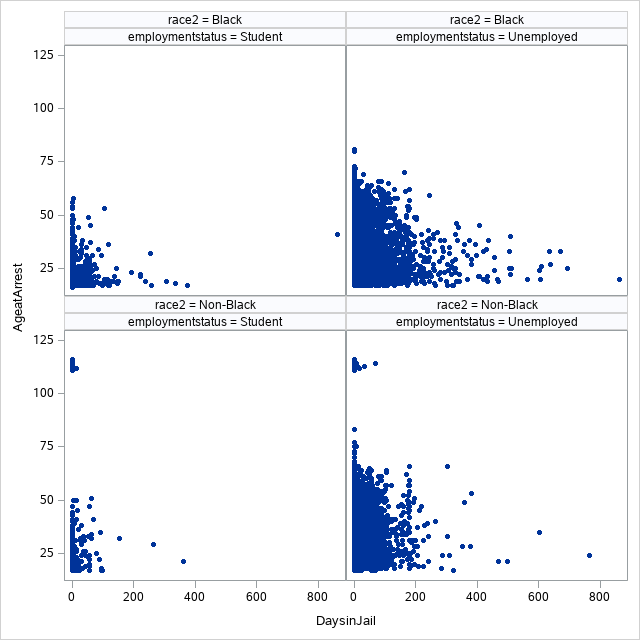

In [8]:
proc sgpanel data=ccso3;
    panelby race2 employmentstatus;
    scatter x=DaysinJail y=AgeatArrest / markerattrs=(symbol=circlefilled);
run;

Looking at the scatter plots above, I can see that those that are students versus unemployed are in jail much less frequently. This is seen through the point density of the scatter plots. Those that are students are also in jail for much less time than those who are unemployed. When comparing between Black and Non-Black people, there seems to be more cased of Black's in jail judging by point density. Those who are black also seem to be in jail longer than those who are non-black. The most frequent observations are those who are unemployed and black. 

Overall, unemployed people have a much higher chance of being in jail as well as typically having a higher number of days spent in jail. It also can be said that Black's are in jail more frequently and also for more days than those who are not black.

In [9]:
data ccso4;
    set ccso;
    hoursserved = (ReleaseDateTime - BookingDateTime) / 3600;
    if race = "Black";
    if hoursserved >= 168 then atleastoneweek = 1;
    else atleastoneweek = 0;
    if employmentstatus = "Student" then nonstudent = 0;
    else nonstudent = 1;
run;


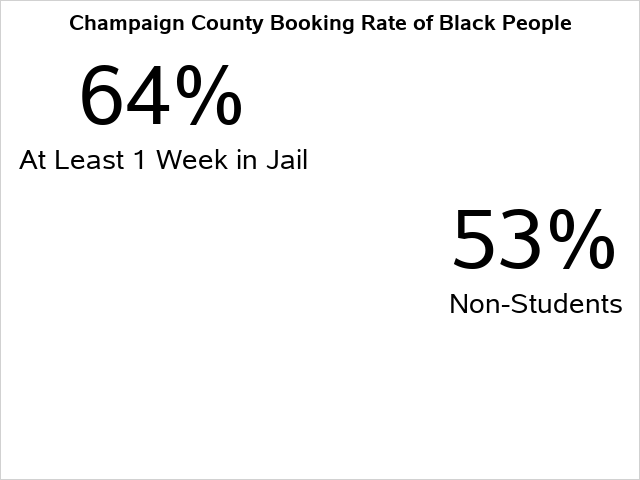

In [29]:
title1 "Champaign County Booking Rate of Black People";
proc sgplot data=ccso4 noborder noautolegend nowall;
title1 height=15pt "Champaign County Booking Rate of Black People" ;
 scatter x=race y=race / markerattrs=(color='white');
 inset "At Least 1 Week in Jail"  / textattrs = (SIZE=20 COLOR='black')
        POSITION=TOPLEFT LABELALIGN=CENTER VALLUEALIGN=CENTER TITLE="64%"
        TITLEATTRS = (SIZE = 60 COLOR="BLACK");
 inset "Non-Students"  / textattrs = (SIZE=20 COLOR='black')
        POSITION=RIGHT LABELALIGN=LEFT VALLUEALIGN=LEFT TITLE="53%"
        TITLEATTRS = (SIZE = 60 COLOR="BLACK");
 xaxis display=none;
 yaxis display=none;
run;
title1;

The plot above shows the booking rate of black people in Champaign County, Illinois. We can see that 64% of black people who are booked into jail spend at least 1 week there, which is quite high. We can also see that 53% of those who are black and booked into jail are non-students. This tells us that 47% of black people are actually students, which is very high.


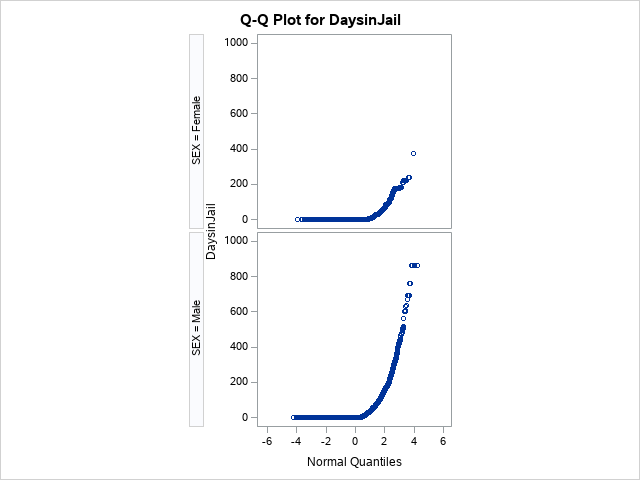

In [57]:
proc univariate data=ccso;
    class sex;
    var daysinjail;
    qqplot daysinjail /square;
    ods select qqplot;
run;

Looking at the Q-Q Plot's above for both female and male of the daysinjail variable, I can see that these distributions are not normal. The Q-Q Plot's are not linear, meaning they are not created from a normal distribution.